In [11]:
import pandas as pd

df = pd.read_csv("../data/All_Pokemon_cleaned.csv")
df

,number,name,type_1,type_2,abilities,hp,att,def,spa,spd,...,against_dark,against_steel,against_fairy,height,weight,bmi,bmi_clipped,atk_def_ratio,offensive_power,defensive_power
0,1,bulbasaur,grass,poison,"['chlorophyll', 'overgrow']",45,49,49,65,65,...,1.0,1.0,0.5,0.7,6.9,14.1,14.1,1.000000,114,114
1,2,ivysaur,grass,poison,"['chlorophyll', 'overgrow']",60,62,63,80,80,...,1.0,1.0,0.5,1.0,13.0,13.0,13.0,0.984127,142,143
2,3,venusaur,grass,poison,"['chlorophyll', 'overgrow']",80,82,83,100,100,...,1.0,1.0,0.5,2.0,100.0,25.0,25.0,0.987952,182,183
3,3,mega_venusaur,grass,poison,['thick fat'],80,100,123,122,120,...,1.0,1.0,0.5,2.4,155.5,27.0,27.0,0.813008,222,243
4,4,charmander,fire,none,"['blaze', 'solar power']",39,52,43,60,50,...,1.0,0.5,0.5,0.6,8.5,23.6,23.6,1.209302,112,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,glastrier,ice,none,['chilling neigh'],100,145,130,65,110,...,1.0,2.0,1.0,2.2,800.0,165.3,100.0,1.115385,210,240
1028,897,spectrier,ghost,none,['grim neigh'],100,65,60,145,80,...,2.0,1.0,1.0,2.0,44.5,11.1,11.1,1.083333,210,140
1029,898,calyrex,psychic,grass,['unnerve'],100,80,80,80,80,...,2.0,1.0,1.0,1.1,7.7,6.4,6.4,1.000000,160,160
1030,898,calyrex_ice_rider,psychic,ice,['as one'],100,165,150,85,130,...,2.0,2.0,1.0,2.4,809.1,140.5,100.0,1.100000,250,280


In [12]:
# unnecesary_columns = [
#     "number",
#     "name",
#     "mean",
#     "standard_deviation",
#     "abilities",
#     "bmi",
# ]
unnecesary_columns = [
    "number",
    "name",
    "mean",
    "standard_deviation",
    "abilities",
    "bmi",
    "hp",
    "att",
    "def",
    "spa",
    "spd",
    "spe",
]
df.drop(unnecesary_columns, axis=1, inplace=True)

In [13]:
columns = df.columns
for col in columns:
    print(f"{col} data = {df[col].head(5).to_list()}")

type_1 data = ['grass', 'grass', 'grass', 'grass', 'fire']
type_2 data = ['poison', 'poison', 'poison', 'poison', 'none']
bst data = [318, 405, 525, 625, 309]
generation data = [1.0, 1.0, 1.0, 6.0, 1.0]
experience_type data = ['Medium Slow', 'Medium Slow', 'Medium Slow', 'Medium Slow', 'Medium Slow']
experience_to_level_100 data = [1059860, 1059860, 1059860, 1059860, 1059860]
final_evolution data = [0.0, 0.0, 1.0, 1.0, 0.0]
catch_rate data = [45, 45, 45, 45, 45]
legendary data = [0.0, 0.0, 0.0, 0.0, 0.0]
mega_evolution data = [0.0, 0.0, 0.0, 1.0, 0.0]
alolan_form data = [0.0, 0.0, 0.0, 0.0, 0.0]
galarian_form data = [0.0, 0.0, 0.0, 0.0, 0.0]
against_normal data = [1.0, 1.0, 1.0, 1.0, 1.0]
against_fire data = [2.0, 2.0, 2.0, 2.0, 0.5]
against_water data = [0.5, 0.5, 0.5, 0.5, 2.0]
against_electric data = [0.5, 0.5, 0.5, 0.5, 1.0]
against_grass data = [0.25, 0.25, 0.25, 0.25, 0.5]
against_ice data = [2.0, 2.0, 2.0, 2.0, 0.5]
against_fighting data = [0.5, 0.5, 0.5, 0.5, 1.0]
against_poiso

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap

In [15]:
le1 = LabelEncoder()
df["type_1"] = le1.fit_transform(df["type_1"])

le2 = LabelEncoder()
df["type_2"] = le2.fit_transform(df["type_2"])

df.head()

,type_1,type_2,bst,generation,experience_type,experience_to_level_100,final_evolution,catch_rate,legendary,mega_evolution,...,against_dragon,against_dark,against_steel,against_fairy,height,weight,bmi_clipped,atk_def_ratio,offensive_power,defensive_power
0,9,14,318,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,...,1.0,1.0,1.0,0.5,0.7,6.9,14.1,1.000000,114,114
1,9,14,405,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,...,1.0,1.0,1.0,0.5,1.0,13.0,13.0,0.984127,142,143
2,9,14,525,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,...,1.0,1.0,1.0,0.5,2.0,100.0,25.0,0.987952,182,183
3,9,14,625,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,...,1.0,1.0,1.0,0.5,2.4,155.5,27.0,0.813008,222,243
4,6,12,309,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,...,1.0,1.0,0.5,0.5,0.6,8.5,23.6,1.209302,112,93


In [16]:
# One-hot encode the 'experience_type' column
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
df_exp = pd.DataFrame(ohe.fit_transform(df[["experience_type"]]))
df_exp.columns = ohe.get_feature_names_out(["experience_type"])

df = pd.concat([df.drop("experience_type", axis=1), df_exp], axis=1)
df

,type_1,type_2,bst,generation,experience_to_level_100,final_evolution,catch_rate,legendary,mega_evolution,alolan_form,...,bmi_clipped,atk_def_ratio,offensive_power,defensive_power,experience_type_Erratic,experience_type_Fast,experience_type_Fluctuating,experience_type_Medium Fast,experience_type_Medium Slow,experience_type_Slow
0,9,14,318,1.0,1059860,0.0,45,0.0,0.0,0.0,...,14.1,1.000000,114,114,0.0,0.0,0.0,0.0,1.0,0.0
1,9,14,405,1.0,1059860,0.0,45,0.0,0.0,0.0,...,13.0,0.984127,142,143,0.0,0.0,0.0,0.0,1.0,0.0
2,9,14,525,1.0,1059860,1.0,45,0.0,0.0,0.0,...,25.0,0.987952,182,183,0.0,0.0,0.0,0.0,1.0,0.0
3,9,14,625,6.0,1059860,1.0,45,0.0,1.0,0.0,...,27.0,0.813008,222,243,0.0,0.0,0.0,0.0,1.0,0.0
4,6,12,309,1.0,1059860,0.0,45,0.0,0.0,0.0,...,23.6,1.209302,112,93,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,11,12,580,8.0,1250000,1.0,3,1.0,0.0,0.0,...,100.0,1.115385,210,240,0.0,0.0,0.0,0.0,0.0,1.0
1028,8,12,580,8.0,1250000,1.0,3,1.0,0.0,0.0,...,11.1,1.083333,210,140,0.0,0.0,0.0,0.0,0.0,1.0
1029,14,9,500,8.0,1250000,1.0,3,1.0,0.0,0.0,...,6.4,1.000000,160,160,0.0,0.0,0.0,0.0,0.0,1.0
1030,14,11,680,8.0,1250000,1.0,3,1.0,0.0,0.0,...,100.0,1.100000,250,280,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
X = df.drop(["type_1", "type_2"], axis=1)
y = df["type_1"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (825, 39)
X_test.shape: (207, 39)


Cross-validation scores: [0.8969697  0.85454545 0.87272727 0.87878788 0.86666667]
Mean cross-validation score: 0.8739393939393938
Test Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       1.00      0.82      0.90        11
           2       0.75      1.00      0.86         6
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         5
           5       0.91      0.83      0.87        12
           6       0.80      1.00      0.89        16
           7       1.00      1.00      1.00         1
           8       1.00      0.75      0.86         8
           9       0.86      1.00      0.92        18
          10       1.00      0.50      0.67         6
          11       1.00      0.78      0.88         9
          12       1.00      0.97      0.98        29
          13       1.00      0.92      0.96        12
          14       1.00  

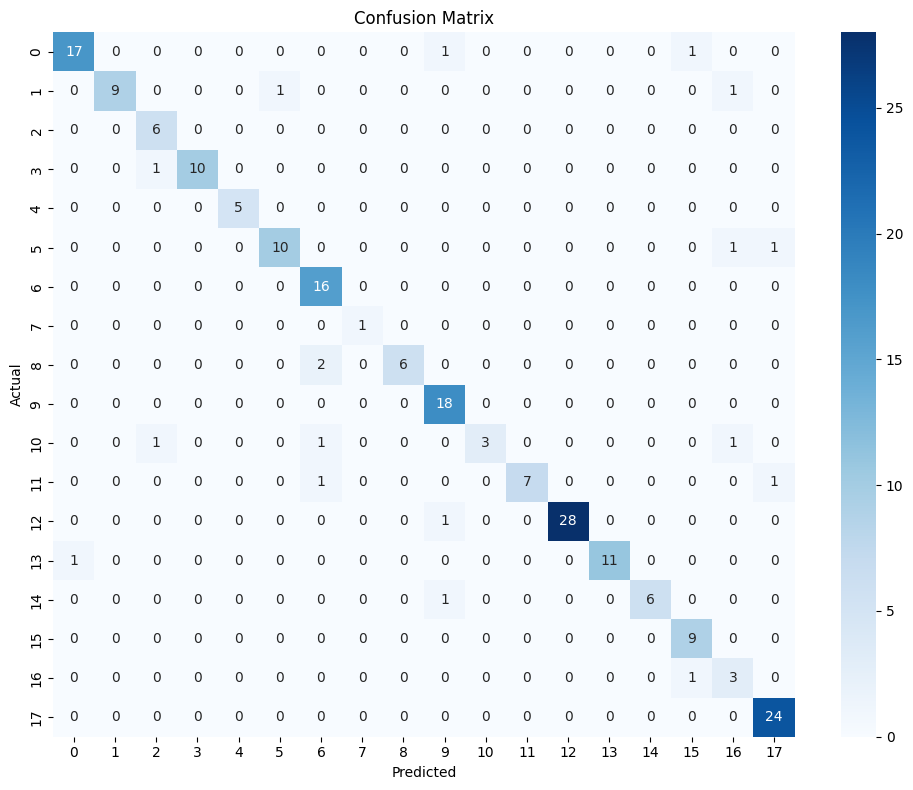

In [18]:
from sklearn.metrics import confusion_matrix

best_model = RandomForestClassifier(
    max_depth=10, min_samples_split=12, n_estimators=50, random_state=42
)


scores = cross_val_score(best_model, X_train, y_train, cv=5)


print("Cross-validation scores:", scores)


print("Mean cross-validation score:", scores.mean())


best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [19]:
x_train_pred = best_model.predict(X_train)
x_train_accuracy = accuracy_score(y_train, x_train_pred)
print("Train Accuracy:", x_train_accuracy)
print(classification_report(y_train, x_train_pred))

Train Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.94      0.94      0.94        35
           2       0.90      0.97      0.93        36
           3       1.00      0.98      0.99        48
           4       1.00      0.94      0.97        17
           5       0.94      0.97      0.95        30
           6       0.94      0.98      0.96        48
           7       1.00      0.57      0.73         7
           8       0.97      0.85      0.90        33
           9       0.96      0.99      0.97        73
          10       0.94      0.86      0.90        35
          11       1.00      0.93      0.96        29
          12       1.00      0.98      0.99        85
          13       1.00      0.96      0.98        28
          14       1.00      0.90      0.95        70
          15       0.79      1.00      0.88        50
          16       0.83      0.94      0.88   

=== DEBUGGING SHAP VALUES STRUCTURE ===
X_test.shape: (207, 39)
shap_values.shape: (207, 39, 18)
Type of shap_values: <class 'numpy.ndarray'>
Unique classes in y_test: 18
Unique classes in y_train: 18
SHAP values structure: 207 samples, 39 features, 18 classes
Generating SHAP summary plot...


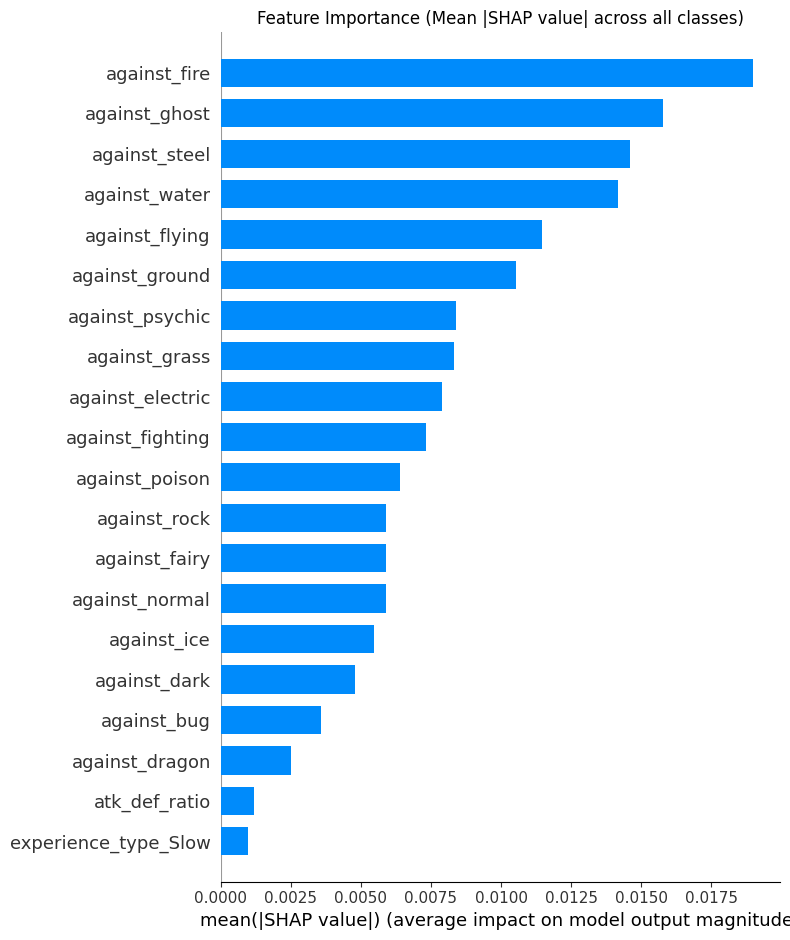

Generating detailed SHAP summary plot for first class...


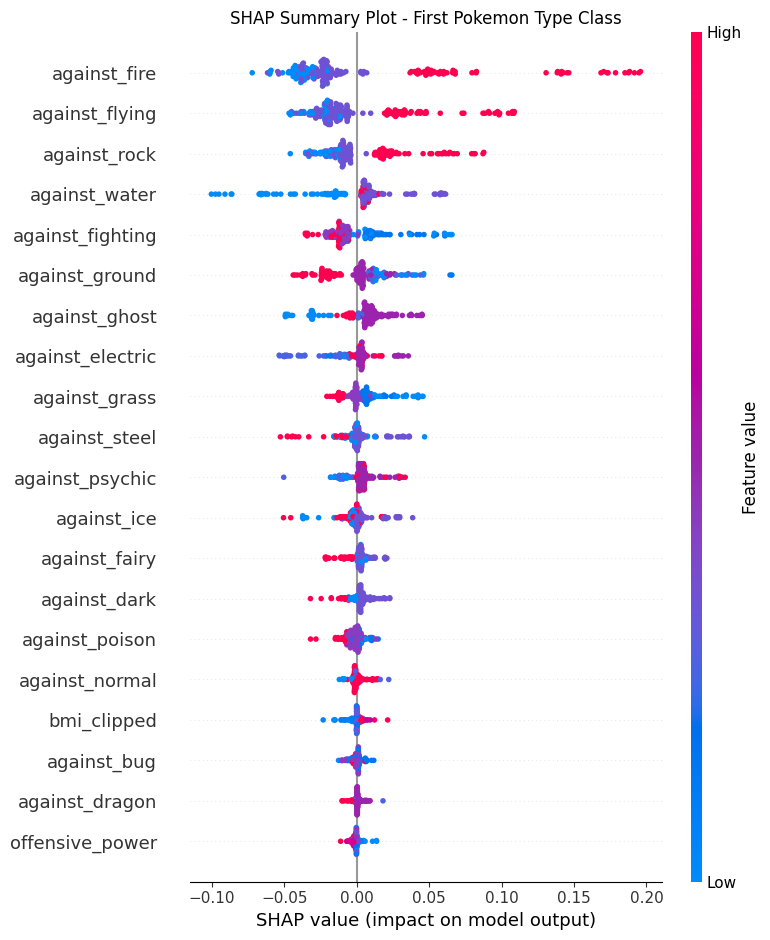

Explaining a single prediction...


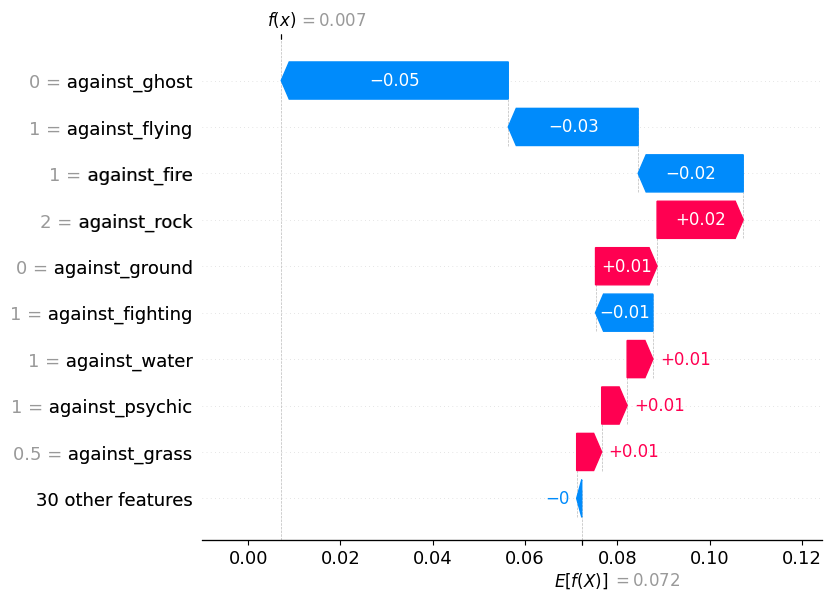


Top 10 Most Important Features (averaged across all classes and samples):
                        feature  importance
10                 against_fire    0.018995
22                against_ghost    0.015775
25                against_steel    0.014612
11                against_water    0.014186
18               against_flying    0.011475
17               against_ground    0.010542
19              against_psychic    0.008395
13                against_grass    0.008336
12             against_electric    0.007897
15             against_fighting    0.007313
16               against_poison    0.006403
21                 against_rock    0.005901
26                against_fairy    0.005897
9                against_normal    0.005896
14                  against_ice    0.005470
24                 against_dark    0.004789
20                  against_bug    0.003580
23               against_dragon    0.002497
30                atk_def_ratio    0.001182
38         experience_type_Slow    0.000985
2

C:\Users\Abhishek Shrestha\AppData\Local\Temp\ipykernel_21292\1089055979.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="importance", y="feature", palette="viridis")


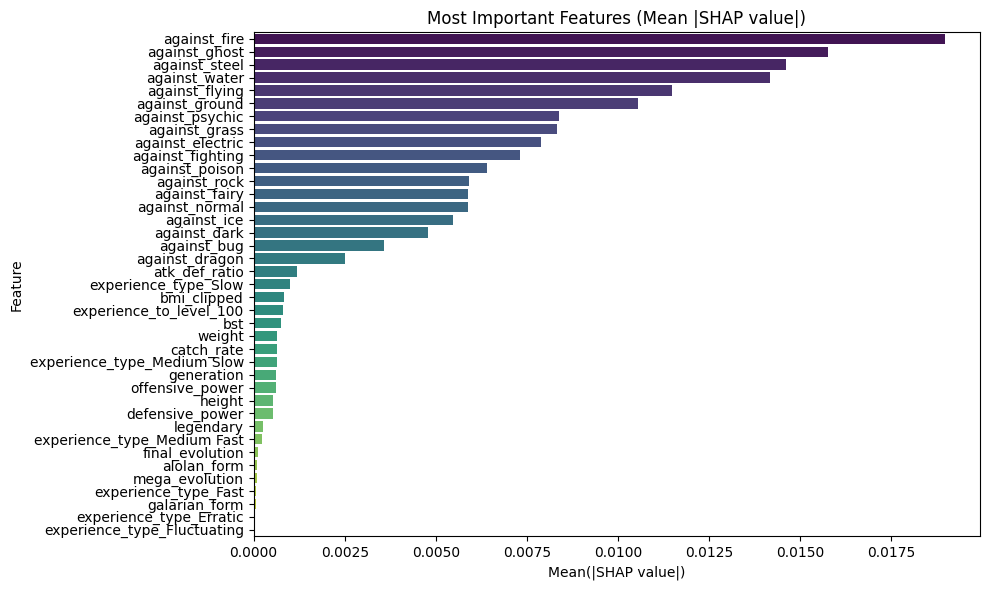


Top 10 Most Important Features for Class 0:
                        feature  importance
10                 against_fire    0.046405
18               against_flying    0.027536
21                 against_rock    0.020090
11                against_water    0.018575
15             against_fighting    0.015269
17               against_ground    0.014237
22                against_ghost    0.014227
12             against_electric    0.009370
13                against_grass    0.008400
25                against_steel    0.006619
19              against_psychic    0.006607
14                  against_ice    0.006035
26                against_fairy    0.004880
24                 against_dark    0.004825
16               against_poison    0.003774
9                against_normal    0.002551
29                  bmi_clipped    0.002228
20                  against_bug    0.002067
23               against_dragon    0.001581
31              offensive_power    0.001519
30                atk_def_ratio

In [20]:
explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test)

print("=== DEBUGGING SHAP VALUES STRUCTURE ===")
print(f"X_test.shape: {X_test.shape}")
print(f"shap_values.shape: {shap_values.shape}")
print(f"Type of shap_values: {type(shap_values)}")

print(f"Unique classes in y_test: {len(pd.Series(y_test).unique())}")
print(f"Unique classes in y_train: {len(pd.Series(y_train).unique())}")

# The structure is (samples, features, classes) = (207, 42, 18)
print(
    f"SHAP values structure: {shap_values.shape[0]} samples, {shap_values.shape[1]} features, {shap_values.shape[2]} classes"
)

# 1. Feature importance across all classes (averaged)
print("Generating SHAP summary plot...")
shap_values_avg = np.mean(np.abs(shap_values), axis=2)
shap.summary_plot(shap_values_avg, X_test, plot_type="bar", show=False)
plt.title("Feature Importance (Mean |SHAP value| across all classes)")
plt.tight_layout()
plt.show()

# 2. Summary plot for first class (class 0)
print("Generating detailed SHAP summary plot for first class...")
shap_values_class0 = shap_values[:, :, 0]
shap.summary_plot(shap_values_class0, X_test, show=False)
plt.title("SHAP Summary Plot - First Pokemon Type Class")
plt.tight_layout()
plt.show()

# 3. Waterfall plot for single prediction (first sample, class 0)
print("Explaining a single prediction...")
explanation = shap.Explanation(
    values=shap_values[0, :, 0],
    base_values=explainer.expected_value[0],
    data=X_test.iloc[0].values,
    feature_names=X_test.columns.tolist(),
)
shap.waterfall_plot(explanation)


# 4. Calculate feature importance correctly
feature_importance = pd.DataFrame(
    {
        "feature": X_test.columns,
        "importance": np.mean(np.abs(shap_values), axis=(0, 2)),
    }
).sort_values("importance", ascending=False)

print("\nTop 10 Most Important Features (averaged across all classes and samples):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="importance", y="feature", palette="viridis")
plt.title("Most Important Features (Mean |SHAP value|)")
plt.xlabel("Mean(|SHAP value|)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 5. Alternative: Feature importance for specific class (first class)
feature_importance_class0 = pd.DataFrame(
    {
        "feature": X_test.columns,
        "importance": np.mean(np.abs(shap_values[:, :, 0]), axis=0),
    }
).sort_values("importance", ascending=False)

print(f"\nTop 10 Most Important Features for Class 0:")
print(feature_importance_class0)

print(f"\nModel has {shap_values.shape[2]} classes (Pokemon types)")
print("SHAP values calculated for all samples, features, and classes")

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10, 12],
    "min_samples_leaf": [1, 2, 4],
}

rfc = RandomForestClassifier(
    max_depth=10, min_samples_split=12, n_estimators=50, random_state=42
)

grid_search = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model_obtained_by_grid_cv = grid_search.best_estimator_

cv_scores = cross_val_score(best_model_obtained_by_grid_cv, X_train, y_train, cv=5)
print("Cross-validation scores (GridSearchCV best model):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

best_model_obtained_by_grid_cv.fit(X_train, y_train)
y_train_pred = best_model_obtained_by_grid_cv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy (GridSearchCV best model):", train_accuracy)
print(classification_report(y_train, y_train_pred))

y_pred = best_model_obtained_by_grid_cv.predict(X_test)
print("Test Accuracy (GridSearchCV best model):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.8921212121212121
Cross-validation scores (GridSearchCV best model): [0.90909091 0.86666667 0.88484848 0.89090909 0.88484848]
Mean cross-validation score: 0.8872727272727273
Train Accuracy (GridSearchCV best model): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        73
          10       1.00      1.

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_categorical("max_depth", [5, 10, 15, None]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4),
        "random_state": 42,
    }
    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best parameters found by Optuna:", study.best_params)
print("Best cross-validation score:", study.best_value)

best_model_obtained_by_optuna = RandomForestClassifier(
    **study.best_params, random_state=42
)

cv_scores = cross_val_score(best_model_obtained_by_optuna, X_train, y_train, cv=5)
print("Cross-validation scores (Optuna best model):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

best_model_obtained_by_optuna.fit(X_train, y_train)
y_train_pred = best_model_obtained_by_optuna.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy (Optuna best model):", train_accuracy)
print(classification_report(y_train, y_train_pred))

y_pred = best_model_obtained_by_optuna.predict(X_test)
print("Test Accuracy (Optuna best model):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[I 2025-06-04 22:22:12,579] A new study created in memory with name: no-name-e1bbad86-bbb6-421d-b824-2a486dfa8a3f
[I 2025-06-04 22:22:13,348] Trial 0 finished with value: 0.8860606060606061 and parameters: {'n_estimators': 119, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8860606060606061.
[I 2025-06-04 22:22:13,800] Trial 1 finished with value: 0.8678787878787878 and parameters: {'n_estimators': 73, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8860606060606061.
[I 2025-06-04 22:22:14,846] Trial 2 finished with value: 0.8606060606060607 and parameters: {'n_estimators': 181, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8860606060606061.
[I 2025-06-04 22:22:15,208] Trial 3 finished with value: 0.8642424242424243 and parameters: {'n_estimators': 62, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value

Best parameters found by Optuna: {'n_estimators': 148, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 1}
Best cross-validation score: 0.890909090909091
Cross-validation scores (Optuna best model): [0.90909091 0.86060606 0.87272727 0.87878788 0.86060606]
Mean cross-validation score: 0.8763636363636363
Train Accuracy (Optuna best model): 0.9527272727272728
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       1.00      0.94      0.97        35
           2       0.90      1.00      0.95        36
           3       1.00      1.00      1.00        48
           4       1.00      0.94      0.97        17
           5       0.97      1.00      0.98        30
           6       0.96      0.98      0.97        48
           7       1.00      0.57      0.73         7
           8       0.97      0.88      0.92        33
           9       0.97      0.99      0.98        73
          10       0.94      0.

Test Accuracy (Bagging + RandomForest): 0.8985507246376812
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       1.00      0.91      0.95        11
           2       0.67      1.00      0.80         6
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00         5
           5       1.00      0.83      0.91        12
           6       0.80      1.00      0.89        16
           7       0.00      0.00      0.00         1
           8       1.00      0.75      0.86         8
           9       0.82      1.00      0.90        18
          10       1.00      0.33      0.50         6
          11       1.00      0.78      0.88         9
          12       1.00      0.97      0.98        29
          13       1.00      0.83      0.91        12
          14       1.00      0.86      0.92         7
          15       0.90      1.00      0.95         9
          16       0.4

C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

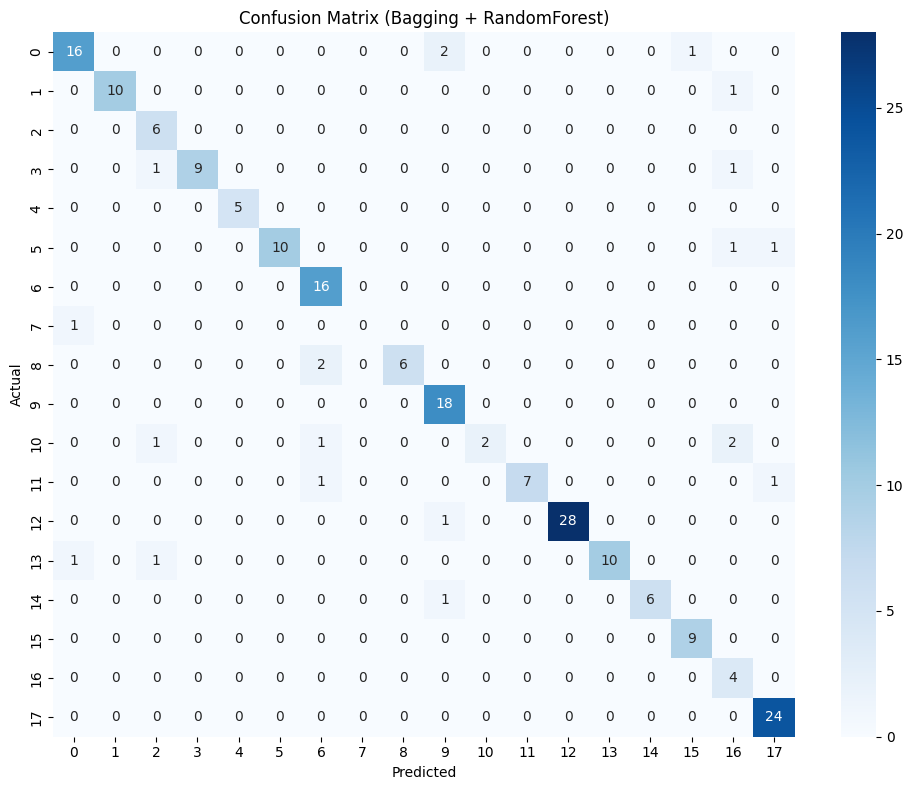

In [23]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Use the same parameters as your best RandomForestClassifier, or tune as needed
base_rf = RandomForestClassifier(
    max_depth=10, min_samples_split=12, n_estimators=50, random_state=42
)

bagging_rf = BaggingClassifier(
    estimator=base_rf,
    n_estimators=10,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42,
)

bagging_rf.fit(X_train, y_train)

y_pred = bagging_rf.predict(X_test)
print("Test Accuracy (Bagging + RandomForest):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

x_train_pred = bagging_rf.predict(X_train)
print("Train Accuracy (Bagging + RandomForest):", accuracy_score(y_train, x_train_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Bagging + RandomForest)")
plt.tight_layout()
plt.show()

In [ ]:
custom_raw = {
    "hp": 70,
    "att": 85,
    "def": 75,
    "spa": 90,
    "spd": 80,
    "spe": 95,
    "bst": 495,
    "generation": 3.0,
    "experience_type": "Medium Slow",
    "experience_to_level_100": 1059860,
    "final_evolution": 1.0,
    "catch_rate": 45,
    "legendary": 0.0,
    "mega_evolution": 0.0,
    "alolan_form": 0.0,
    "galarian_form": 0.0,
    "against_normal": 1.0,
    "against_fire": 1.0,
    "against_water": 1.0,
    "against_electric": 1.0,
    "against_grass": 1.0,
    "against_ice": 1.0,
    "against_fighting": 1.0,
    "against_poison": 1.0,
    "against_ground": 1.0,
    "against_flying": 1.0,
    "against_psychic": 1.0,
    "against_bug": 1.0,
    "against_rock": 1.0,
    "against_ghost": 1.0,
    "against_dragon": 1.0,
    "against_dark": 1.0,
    "against_steel": 1.0,
    "against_fairy": 1.0,
    "height": 1.2,
    "weight": 40.0,
    "bmi_clipped": 27.0,
}


custom_df = pd.DataFrame([custom_raw])


custom_exp = (pd.DataFrame(ohe.transform(custom_df[["experience_type"]])),)


custom_exp[0].columns = ohe.get_feature_names_out(["experience_type"])


custom_df = pd.concat(
    [custom_df.drop("experience_type", axis=1), custom_exp[0]], axis=1
)


custom_df = custom_df.reindex(columns=X_train.columns, fill_value=0)



pred_type_encoded = best_model.predict(custom_df)[0]


pred_type = le1.inverse_transform([pred_type_encoded])[0]


print(f"Predicted primary type for custom Pokémon: {pred_type}")

Predicted primary type for custom Pokémon: ice


In [25]:
custom_raw2 = {
    "hp": 90,
    "att": 110,
    "def": 70,
    "spa": 65,
    "spd": 60,
    "spe": 80,
    "bst": 475,
    "generation": 2.0,
    "experience_type": "Medium Slow",
    "experience_to_level_100": 1059860,
    "final_evolution": 1.0,
    "catch_rate": 45,
    "legendary": 0.0,
    "mega_evolution": 0.0,
    "alolan_form": 0.0,
    "galarian_form": 0.0,
    "against_normal": 2.0,
    "against_fire": 0.5,
    "against_water": 4.0,
    "against_electric": 1.0,
    "against_grass": 0.25,
    "against_ice": 2.0,
    "against_fighting": 1.0,
    "against_poison": 0.0,
    "against_ground": 3.0,
    "against_flying": 1.0,
    "against_psychic": 0.5,
    "against_bug": 2.0,
    "against_rock": 1.0,
    "against_ghost": 4.0,
    "against_dragon": 1.0,
    "against_dark": 0.5,
    "against_steel": 1.0,
    "against_fairy": 2.0,
    "height": 1.7,
    "weight": 60.0,
    "bmi_clipped": 20.8,
}

custom_df2 = pd.DataFrame([custom_raw2])

# One-hot encode 'experience_type' using the fitted encoder
custom_exp2 = pd.DataFrame(ohe.transform(custom_df2[["experience_type"]]))
custom_exp2.columns = ohe.get_feature_names_out(["experience_type"])

# Drop 'experience_type' and concat encoded columns
custom_df2 = pd.concat(
    [custom_df2.drop("experience_type", axis=1), custom_exp2], axis=1
)

# Ensure columns match training data
custom_df2 = custom_df2.reindex(columns=X_train.columns, fill_value=0)

# Predict
pred_type_encoded2 = best_model.predict(custom_df2)[0]
pred_type2 = le1.inverse_transform([pred_type_encoded2])[0]
print(f"Predicted primary type for custom Pokémon 2: {pred_type2}")

Predicted primary type for custom Pokémon 2: dark
